## Data Exploration

#### Importing data as dataframe

In [1]:
import pandas as pd

df = pd.read_csv("blkjckhands.csv")

df.head(10)

c:\Users\User\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,Unnamed: 0,PlayerNo,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,...,dealcard4,dealcard5,sumofdeal,blkjck,winloss,plybustbeat,dlbustbeat,plwinamt,dlwinamt,ply2cardsum
0,0,Player1,7,10,0,0,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,17
1,1,Player2,10,9,0,0,0,19,10,8,...,0,0,18,nowin,Win,Plwin,Beat,20,0,19
2,2,Player3,9,8,0,0,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,17
3,3,Player4,2,10,0,5,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,12
4,4,Player5,10,2,0,5,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,12
5,5,Player6,6,1,8,10,0,25,10,8,...,0,0,18,nowin,Loss,Bust,PlBust,0,10,7
6,0,Player1,10,4,0,0,0,14,4,4,...,10,0,23,nowin,Win,DlBust,Bust,20,0,14
7,1,Player2,3,10,0,0,0,13,4,4,...,10,0,23,nowin,Win,DlBust,Bust,20,0,13
8,2,Player3,10,2,0,0,0,12,4,4,...,10,0,23,nowin,Win,DlBust,Bust,20,0,12
9,3,Player4,9,6,0,0,0,15,4,4,...,10,0,23,nowin,Win,DlBust,Bust,20,0,15


#### Basic data info & Drop Indices 

In [2]:
print(df.columns)
df.info

Index(['Unnamed: 0', 'PlayerNo', 'card1', 'card2', 'card3', 'card4', 'card5',
       'sumofcards', 'dealcard1', 'dealcard2', 'dealcard3', 'dealcard4',
       'dealcard5', 'sumofdeal', 'blkjck', 'winloss', 'plybustbeat',
       'dlbustbeat', 'plwinamt', 'dlwinamt', 'ply2cardsum'],
      dtype='object')


<bound method DataFrame.info of         Unnamed: 0 PlayerNo  card1  card2  card3  card4  card5  sumofcards  \
0                0  Player1      7     10      0      0      0          17   
1                1  Player2     10      9      0      0      0          19   
2                2  Player3      9      8      0      0      0          17   
3                3  Player4      2     10      0      5      0          17   
4                4  Player5     10      2      0      5      0          17   
...            ...      ...    ...    ...    ...    ...    ...         ...   
899995           1  Player2     10      7      0      0      0          17   
899996           2  Player3      6      1     10      0      0          17   
899997           3  Player4      4      2      9      0      0          15   
899998           4  Player5      9     10      0      0      0          19   
899999           5  Player6      5     10      0      0      0          15   

        dealcard1  dealcard2  .

As we can see from df.info, there are 900000 entries in this dataset, with 21 columns in each row. Below is a list of column descriptions from the Kaggle dataset provider.

- Index: 
Index of each entry


- PlayerNo:
Identifies each player - There are 6 of them playing each round.


- card1:
First card dealt to the player.


- card2:
Second card dealt to the player.


- card3:
Third card dealt to the player. (If needed else 0)


- card4:
Fourth card dealt to the player. (If needed else 0)


- card5:
Fifth card dealt to the player. (If needed else 0)


- sumofcards:
Sum of all cards of player


- dealcard1:
First card dealt to the Dealer.


- dealcard2:
Second card dealt to the Dealer.


- dealcard3:
Third card dealt to the Dealer. (If needed else 0)


- dealcard4:
Fourth card dealt to the Dealer. (If needed else 0)


- dealcard5:
Fifth card dealt to the Dealer. (If needed else 0)


- sumofdeal:
Sum of all cards of Dealer


- blkjck:
If the Player hits a Blackjack


- winloss:
Player WIn or Loss


- plybustbeat:
If Player loses, was he Beat or did he Bust


- dlbustbeat:
If Dealer loses, was he Beat or did he Bust


- plwinamt:
Total amount won by Player (each round)


- dlwinamt:
Total amount won by Dealer (each round)


- ply2cardsum:
Sum of first 2 cards dealt to a player

We can drop Index and PlayerNo columns, as we are only really interested in the probability of winning depending on hand. 
We will also drop the plybustbeat and dlbustbeat columns since they are redundant to each other and can be derived from other columns.

In [3]:
df = df.drop(columns=['Unnamed: 0','PlayerNo', 'plybustbeat', 'dlbustbeat'])

In [4]:
df.head(5)

,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,dealcard3,dealcard4,dealcard5,sumofdeal,blkjck,winloss,plwinamt,dlwinamt,ply2cardsum
0,7,10,0,0,0,17,10,8,0,0,0,18,nowin,Loss,0,10,17
1,10,9,0,0,0,19,10,8,0,0,0,18,nowin,Win,20,0,19
2,9,8,0,0,0,17,10,8,0,0,0,18,nowin,Loss,0,10,17
3,2,10,0,5,0,17,10,8,0,0,0,18,nowin,Loss,0,10,12
4,10,2,0,5,0,17,10,8,0,0,0,18,nowin,Loss,0,10,12


#### COLUMNS: A closer look

In [5]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


No missing data! Hooray!

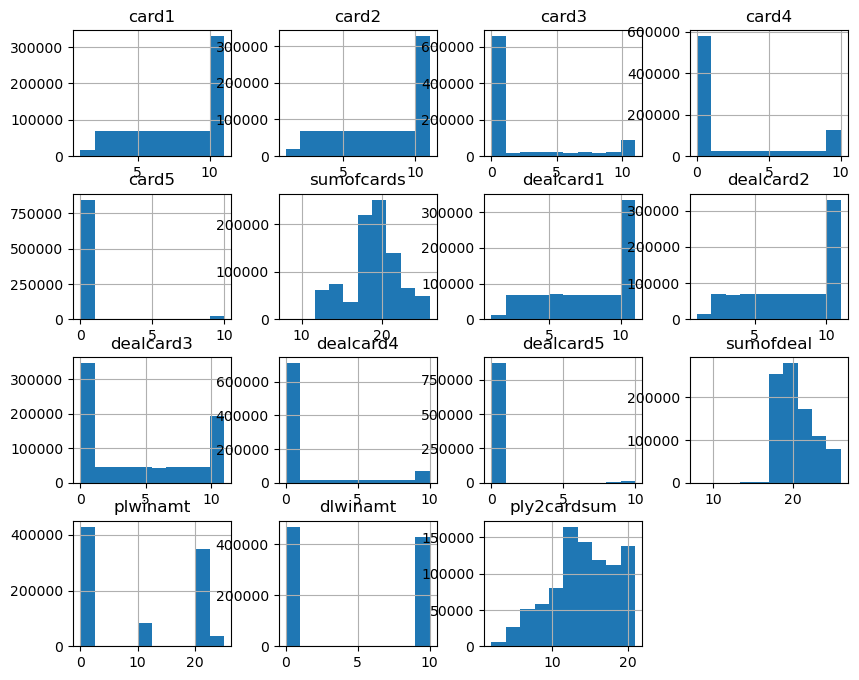

In [6]:
import matplotlib.pyplot as plt

# Histogram for numerical columns
df.hist(figsize=(10, 8))
plt.show()

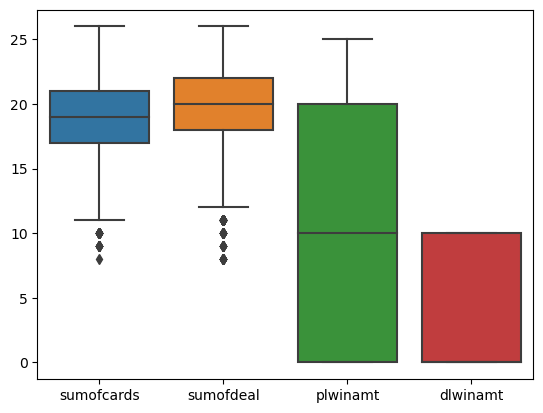

In [7]:
import seaborn as sns

sns.boxplot(data=df[['sumofcards', 'sumofdeal', 'plwinamt', 'dlwinamt']])
plt.show()

Below are the value counts for the 4 categorical value

In [8]:
print(df['winloss'].value_counts(),"\n") 
print(df['blkjck'].value_counts(),"\n") 
#print(df['plybustbeat'].value_counts(),"\n") 
#print(df['dlbustbeat'].value_counts(),"\n") 

winloss
Loss    429821
Win     385946
Push     84233
Name: count, dtype: int64 

blkjck
nowin    856939
Win       43061
Name: count, dtype: int64 



## Data Preprocessing

#### Encoding

For better comprehensibility and to simplify later operations, we will map the categorical columns to integers

In [9]:
df['winloss'] = df['winloss'].map({'Win': 1, 'Loss': -1, 'Push': 0})  
df['blkjck'] = df['blkjck'].map({'nowin': 0, 'Win': 1})  

#### Scaling for monetary columns

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['plwinamt', 'dlwinamt']] = scaler.fit_transform(df[['plwinamt', 'dlwinamt']])

#### Some random feature expansions

In [11]:
df['card1_card2_product'] = df['card1'] * df['card2']
df['hand_vs_dealer_ratio'] = df['sumofcards'] / (df['sumofdeal'] + 1e-5)  
df['sumofcards_squared'] = df['sumofcards'] ** 2
df['sumofdeal_squared'] = df['sumofdeal'] ** 2

#### Log transform skewed data

In [12]:
import numpy as np

df['log_plwinamt'] = np.log1p(df['plwinamt'])  # log(1 + x) to avoid log(0)
df['log_dlwinamt'] = np.log1p(df['dlwinamt'])

#### Inspect the end product 

In [13]:
print(df.info()) 
print(df.head()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   card1                 900000 non-null  int64  
 1   card2                 900000 non-null  int64  
 2   card3                 900000 non-null  int64  
 3   card4                 900000 non-null  int64  
 4   card5                 900000 non-null  int64  
 5   sumofcards            900000 non-null  int64  
 6   dealcard1             900000 non-null  int64  
 7   dealcard2             900000 non-null  int64  
 8   dealcard3             900000 non-null  int64  
 9   dealcard4             900000 non-null  int64  
 10  dealcard5             900000 non-null  int64  
 11  sumofdeal             900000 non-null  int64  
 12  blkjck                900000 non-null  int64  
 13  winloss               900000 non-null  int64  
 14  plwinamt              900000 non-null  float64
 15  

## Output the final CSV for other scripts


In [14]:
df.to_csv("preprocessed_blkjckhands.csv", index=False)
